## YOLO
YOLO (You Only Look Once), is a popular object detection and image segmentation model.

In this document will show you on logo detection using YOLOv8

### Setting up YOLOv8
To train YOLOv8 on a custom dataset, we need to install the ultralytics package. We can install the package using `pip`.

`pip install ultralytics`


### Custom Dataset to Train YOLOv8

**Data collection**

Collect a set of images that have the objects you want to detect. Make sure to use high-quality images, in focus, and the objects are clearly visible

**Data labelling**

Label the dataset after collected the images. This means identifying the objects in each image and their bounding boxes. There are tools like LabelImg, CVAT, labelstudio, and Roboflow to label the images. 

**Data Splitting**

To train machine learning models, you have to split your data into training and validation sets. Try using a 70%-30% split ratio when using large amounts of data. Otherwise, stick to 80%-20% to avoid overfitting or underfitting your model.

1. training dataset

2. validation dataset


## GPU access

In [2]:
!nvidia-smi

Tue Mar 19 14:22:06 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.26                 Driver Version: 546.26       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   42C    P8               6W /  30W |     15MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import os
HOME = os.getcwd()
print(HOME)
%cd {HOME}/datasets

C:\Users\Admin\Documents\ultralytics


In [4]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.152  Python-3.11.3 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
Setup complete  (16 CPUs, 23.2 GB RAM, 204.2/240.0 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [12]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oRUKgldL4OffmQ8aCNw2")
project = rf.workspace("logo-fjdbt").project("chequeinfo")
version = project.version(2)
dataset = version.download("yolov8")

C:\Users\Admin\Documents\ultralytics\datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.152, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to chequeinfo-2 in yolov8:: 100%|██████████████████| 1212/1212 [00:02<00:00, 459.57it/s]


## YOLOv8 parameter 
Here is an explanation of some of the commonly used parameters:

Parameter           | Description 
:-------------------|:---------------------------------------------------------------------------------------------------------
`Task` (optional)   | `Detect`: For identifying and localizing objects or regions of interest in an image or video. `Segment`: For dividing an image or video into regions or pixels that correspond to different objects or classes. `Classify`: For predicting the class label of an input image. `Pose`: For identifying objects and estimating their keypoints in an image or video.
`mode` (required)   | `Train`: For training a YOLOv8 model on a custom dataset. `Val`: For validating a YOLOv8 model after it has been trained. `Predict`: For making predictions using a trained YOLOv8 model on new images or videos. `Export`: For exporting a YOLOv8 model to a format that can be used for deployment.`Track`: For tracking objects in real-time using a YOLOv8 model. `Benchmark`: For benchmarking YOLOv8 exports (ONNX, TensorRT, etc.) speed and accuracy.

## Train Modes

Basic syntax for the training command.

```Python
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True
```

The training settings for YOLO models encompass various hyperparameters and configurations used during the training process. These settings influence the model's performance, speed, and accuracy. Key training settings include batch size, learning rate, momentum, and weight decay. Additionally, the choice of optimizer, loss function, and training dataset composition can impact the training process. Careful tuning and experimentation with these settings are crucial for optimizing performance.

Here is an explanation of some of the commonly used parameters:

Parameter           | Description 
:-------------------|:---------------------------------------------------------------------------------------------------------
`model`             | Path to model file
`data`              | Path to data file
`epochs`            | Number of epochs to train for
`patience`          | Epochs to wait for no observable improvement for early stopping of training
`batch`             | Number of images per batch 
`imgsz`             | Size of input images as integer 
`save`              | save train checkpoints and predict results
`save_period`       | Save checkpoint every x epochs
`cache`             | True/ram, disk or False. Use cache for data loading
`device`            | device to run on, i.e. cuda device=0 or device=0,1,2,3 or device=cpu
`name`              | Experiment name

## Custom Training

In [21]:
!yolo task=detect mode=train model=yolov8s.pt data=C:/Users/Admin/Documents/ultralytics/datasets/chequeinfo-2/data.yaml epochs=25 imgsz=640 plots=True

New https://pypi.org/project/ultralytics/8.1.27 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196  Python-3.11.3 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:/Users/Admin/Documents/ultralytics/datasets/chequeinfo-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffe

In [48]:
import os

# List files and directories in the specified path
path = r'C:\Users\Admin\Documents\ultralytics\datasets\runs\detect\train'
contents = os.listdir(path)
print(contents)

['args.yaml', 'confusion_matrix.png', 'confusion_matrix_normalized.png', 'events.out.tfevents.1710340142.LAPTOP-3AAPI9EN.28392.0', 'F1_curve.png', 'labels.jpg', 'labels_correlogram.jpg', 'PR_curve.png', 'P_curve.png', 'results.csv', 'results.png', 'R_curve.png', 'train_batch0.jpg', 'train_batch1.jpg', 'train_batch2.jpg', 'train_batch405.jpg', 'train_batch406.jpg', 'train_batch407.jpg', 'val_batch0_labels.jpg', 'val_batch0_pred.jpg', 'val_batch1_labels.jpg', 'val_batch1_pred.jpg', 'val_batch2_labels.jpg', 'val_batch2_pred.jpg', 'weights']


## Performance Metrics
- F1 Confidence: Shows the F1 score (harmonic mean of precision and recall) at different confidence thresholds. A higher peak suggests better model performance.
- Precision-Recall Curve: Illustrates the trade-off between precision and recall for different thresholds. A model that reaches closer to the top-right corner is better.
- Precision-Confidence Curve: Displays how precision changes with different confidence levels. Ideally, you want high precision across all confidence levels.
- Recall-Confidence Curve: Shows the recall at various confidence thresholds. You're looking for high recall across the board.
- Confusion Matrix: Summarizes the performance of classification. Diagonal values represent correct predictions, while off-diagonal values indicate misclassifications.

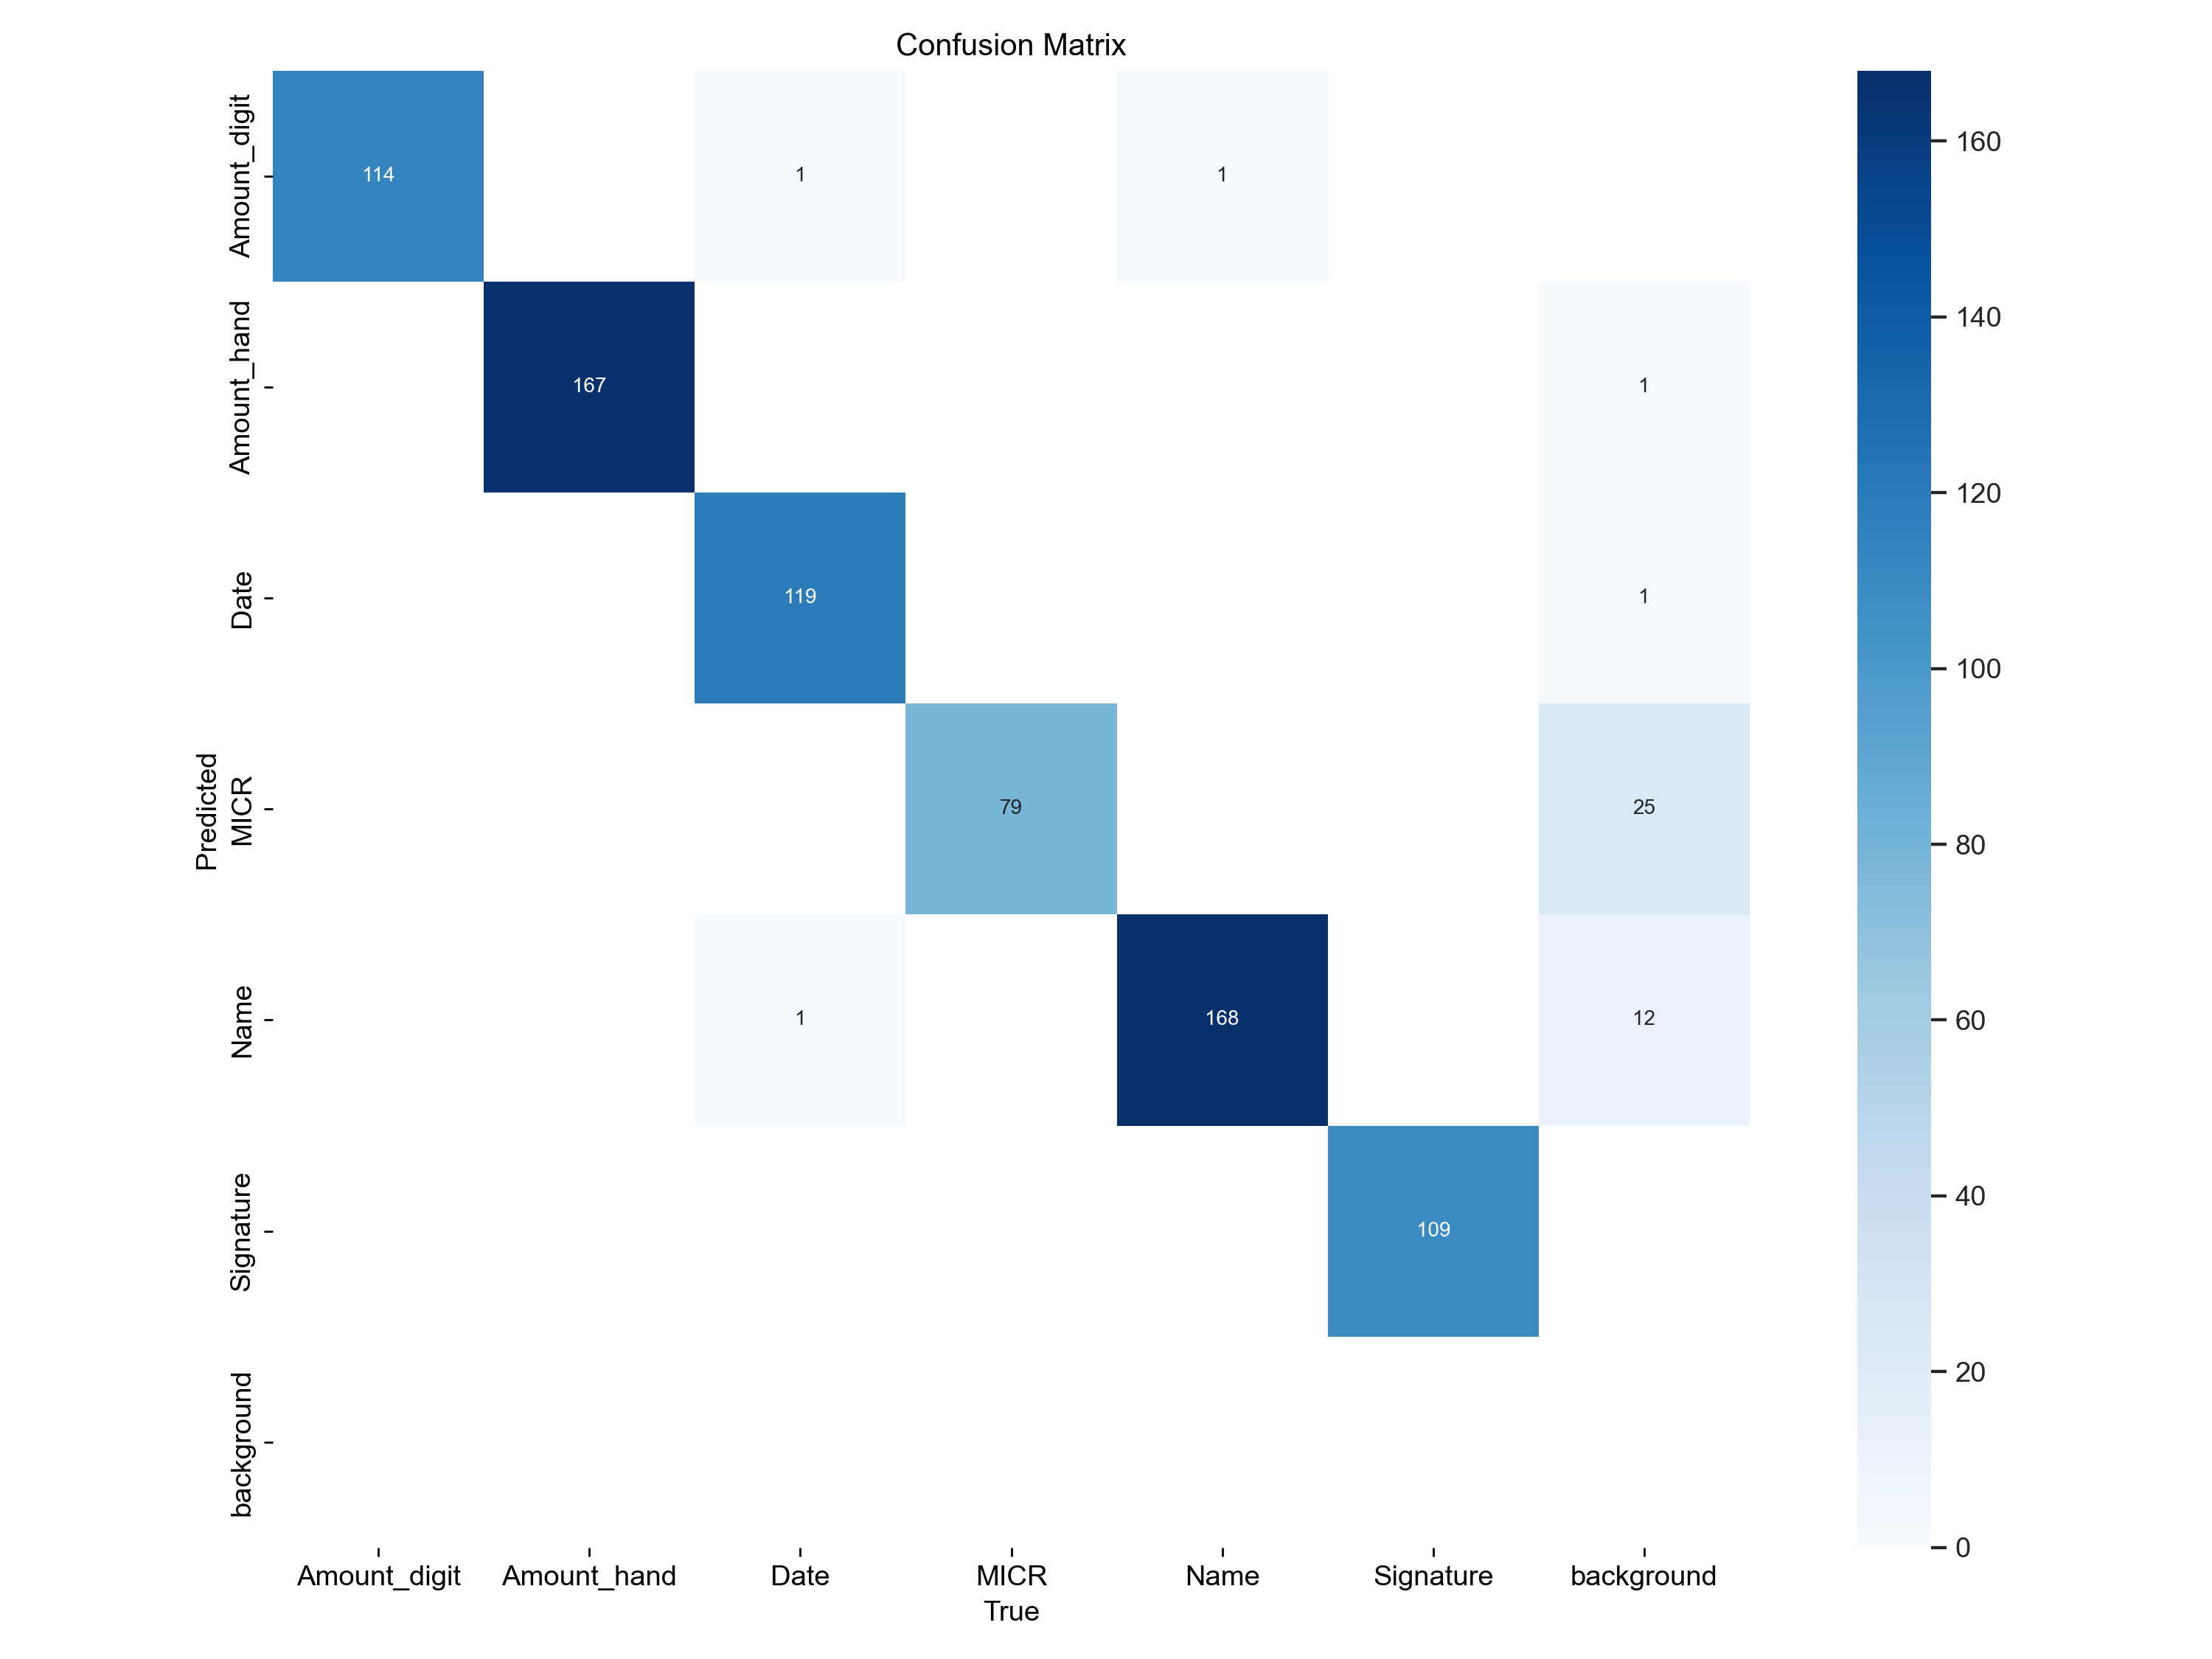

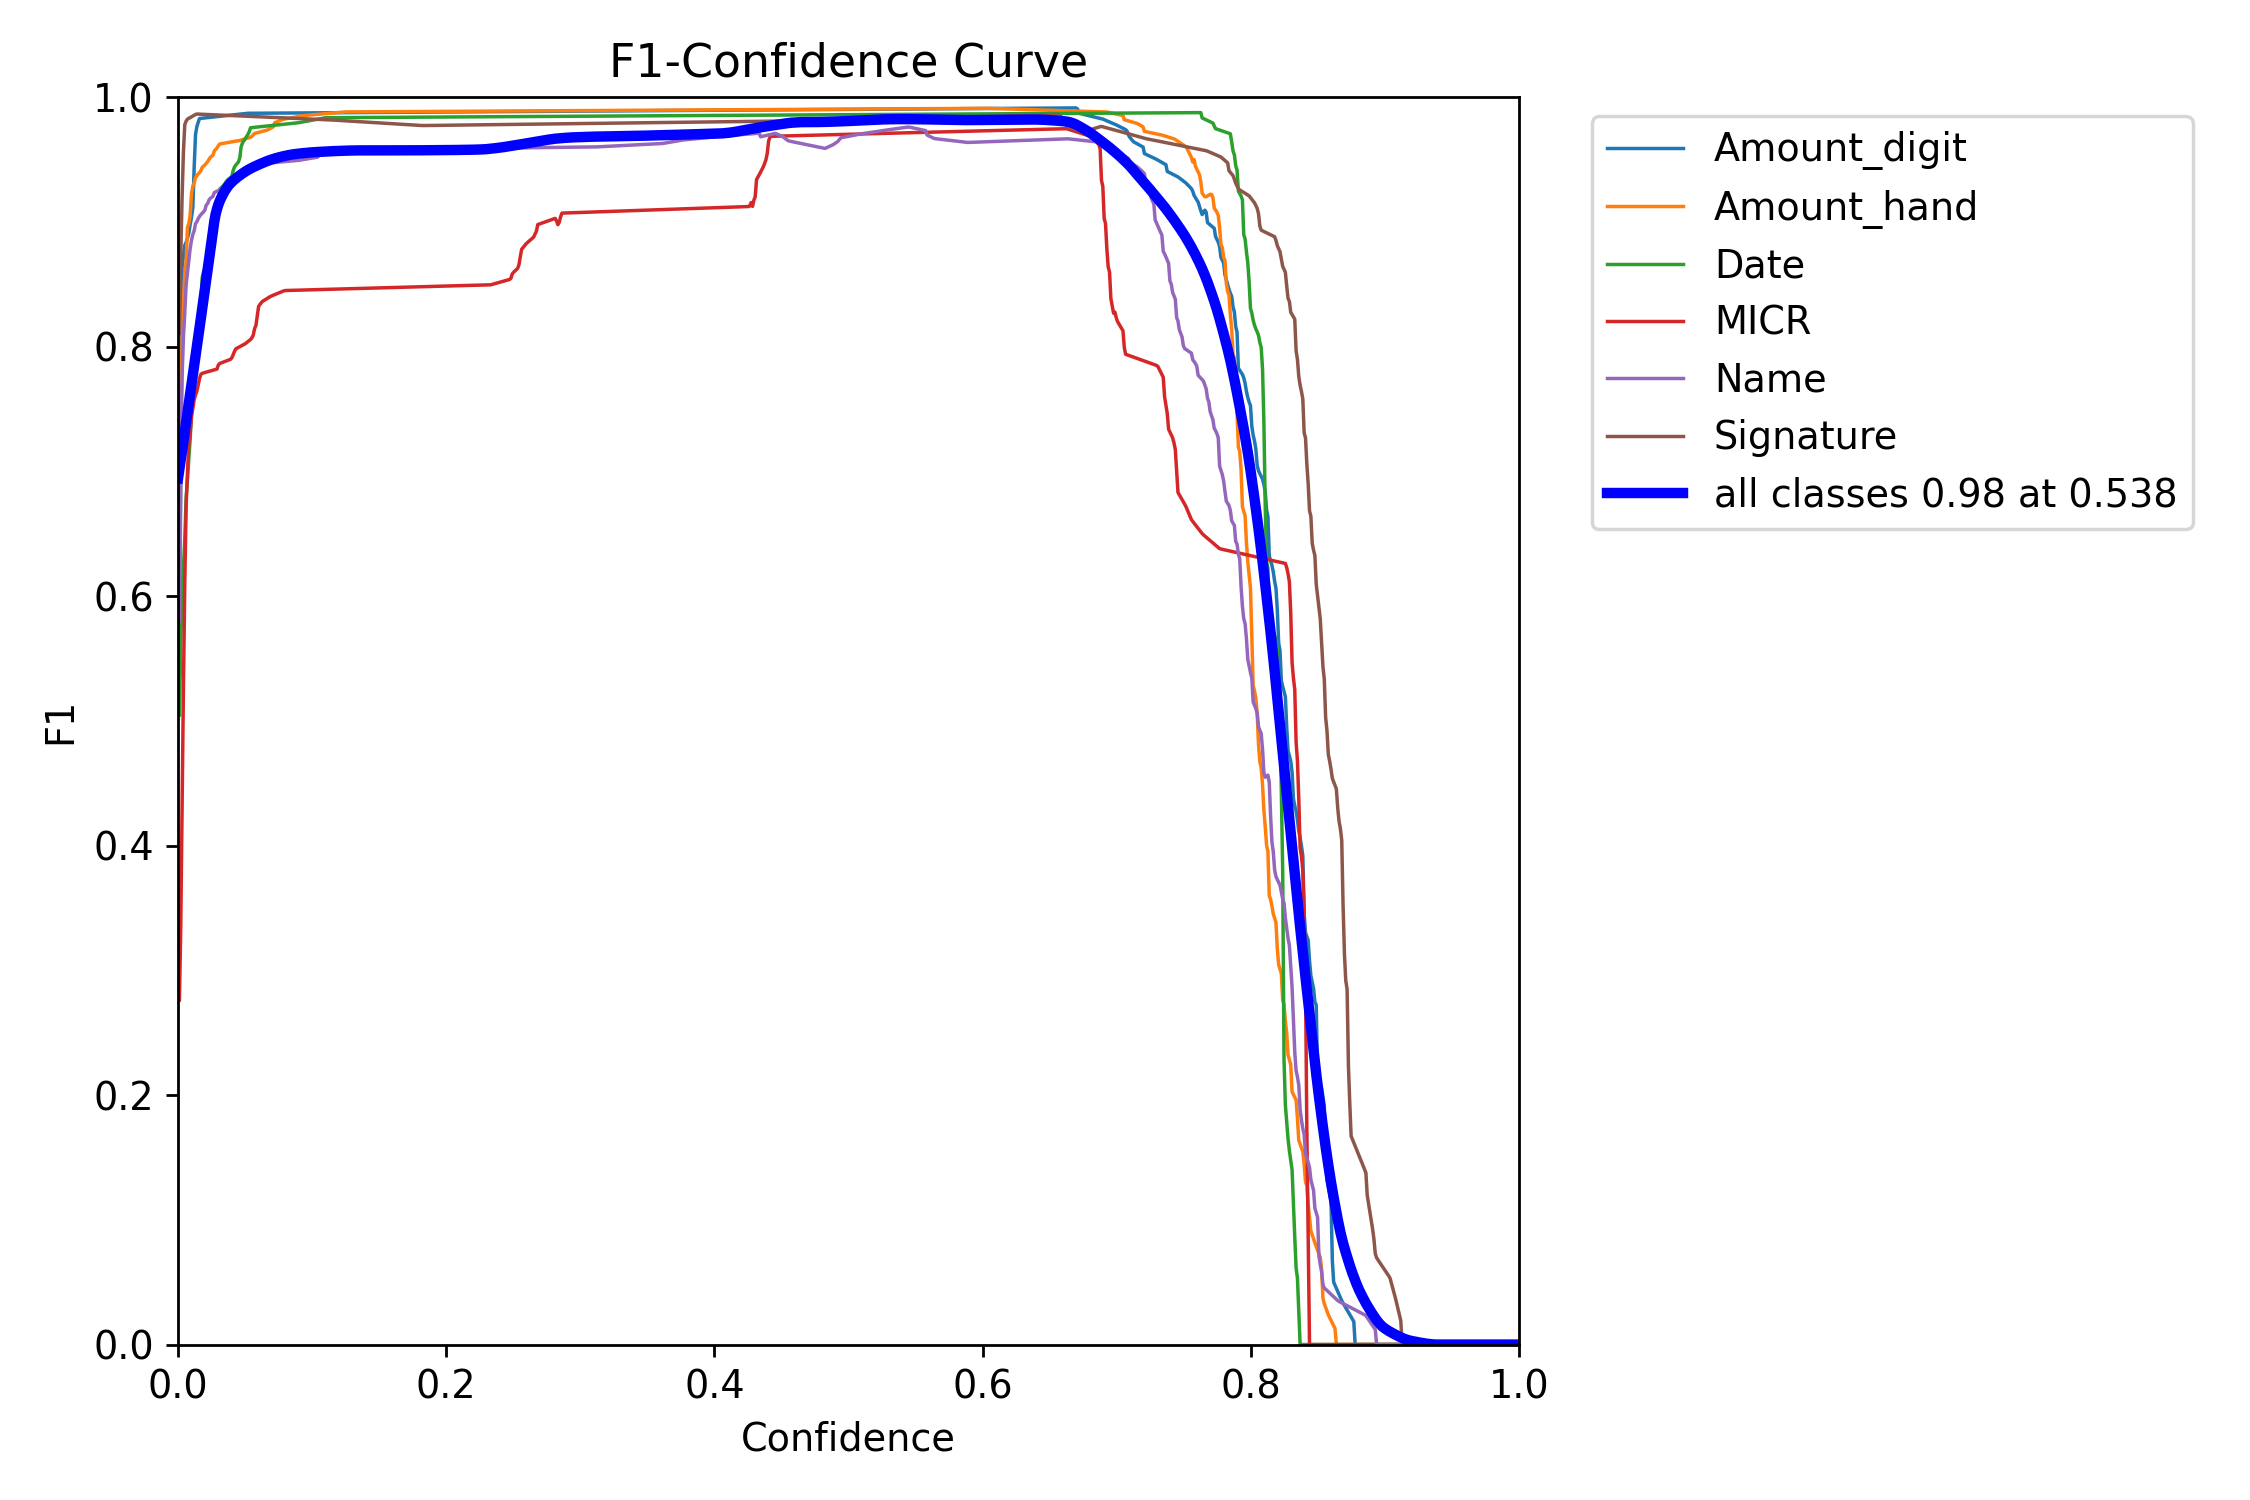

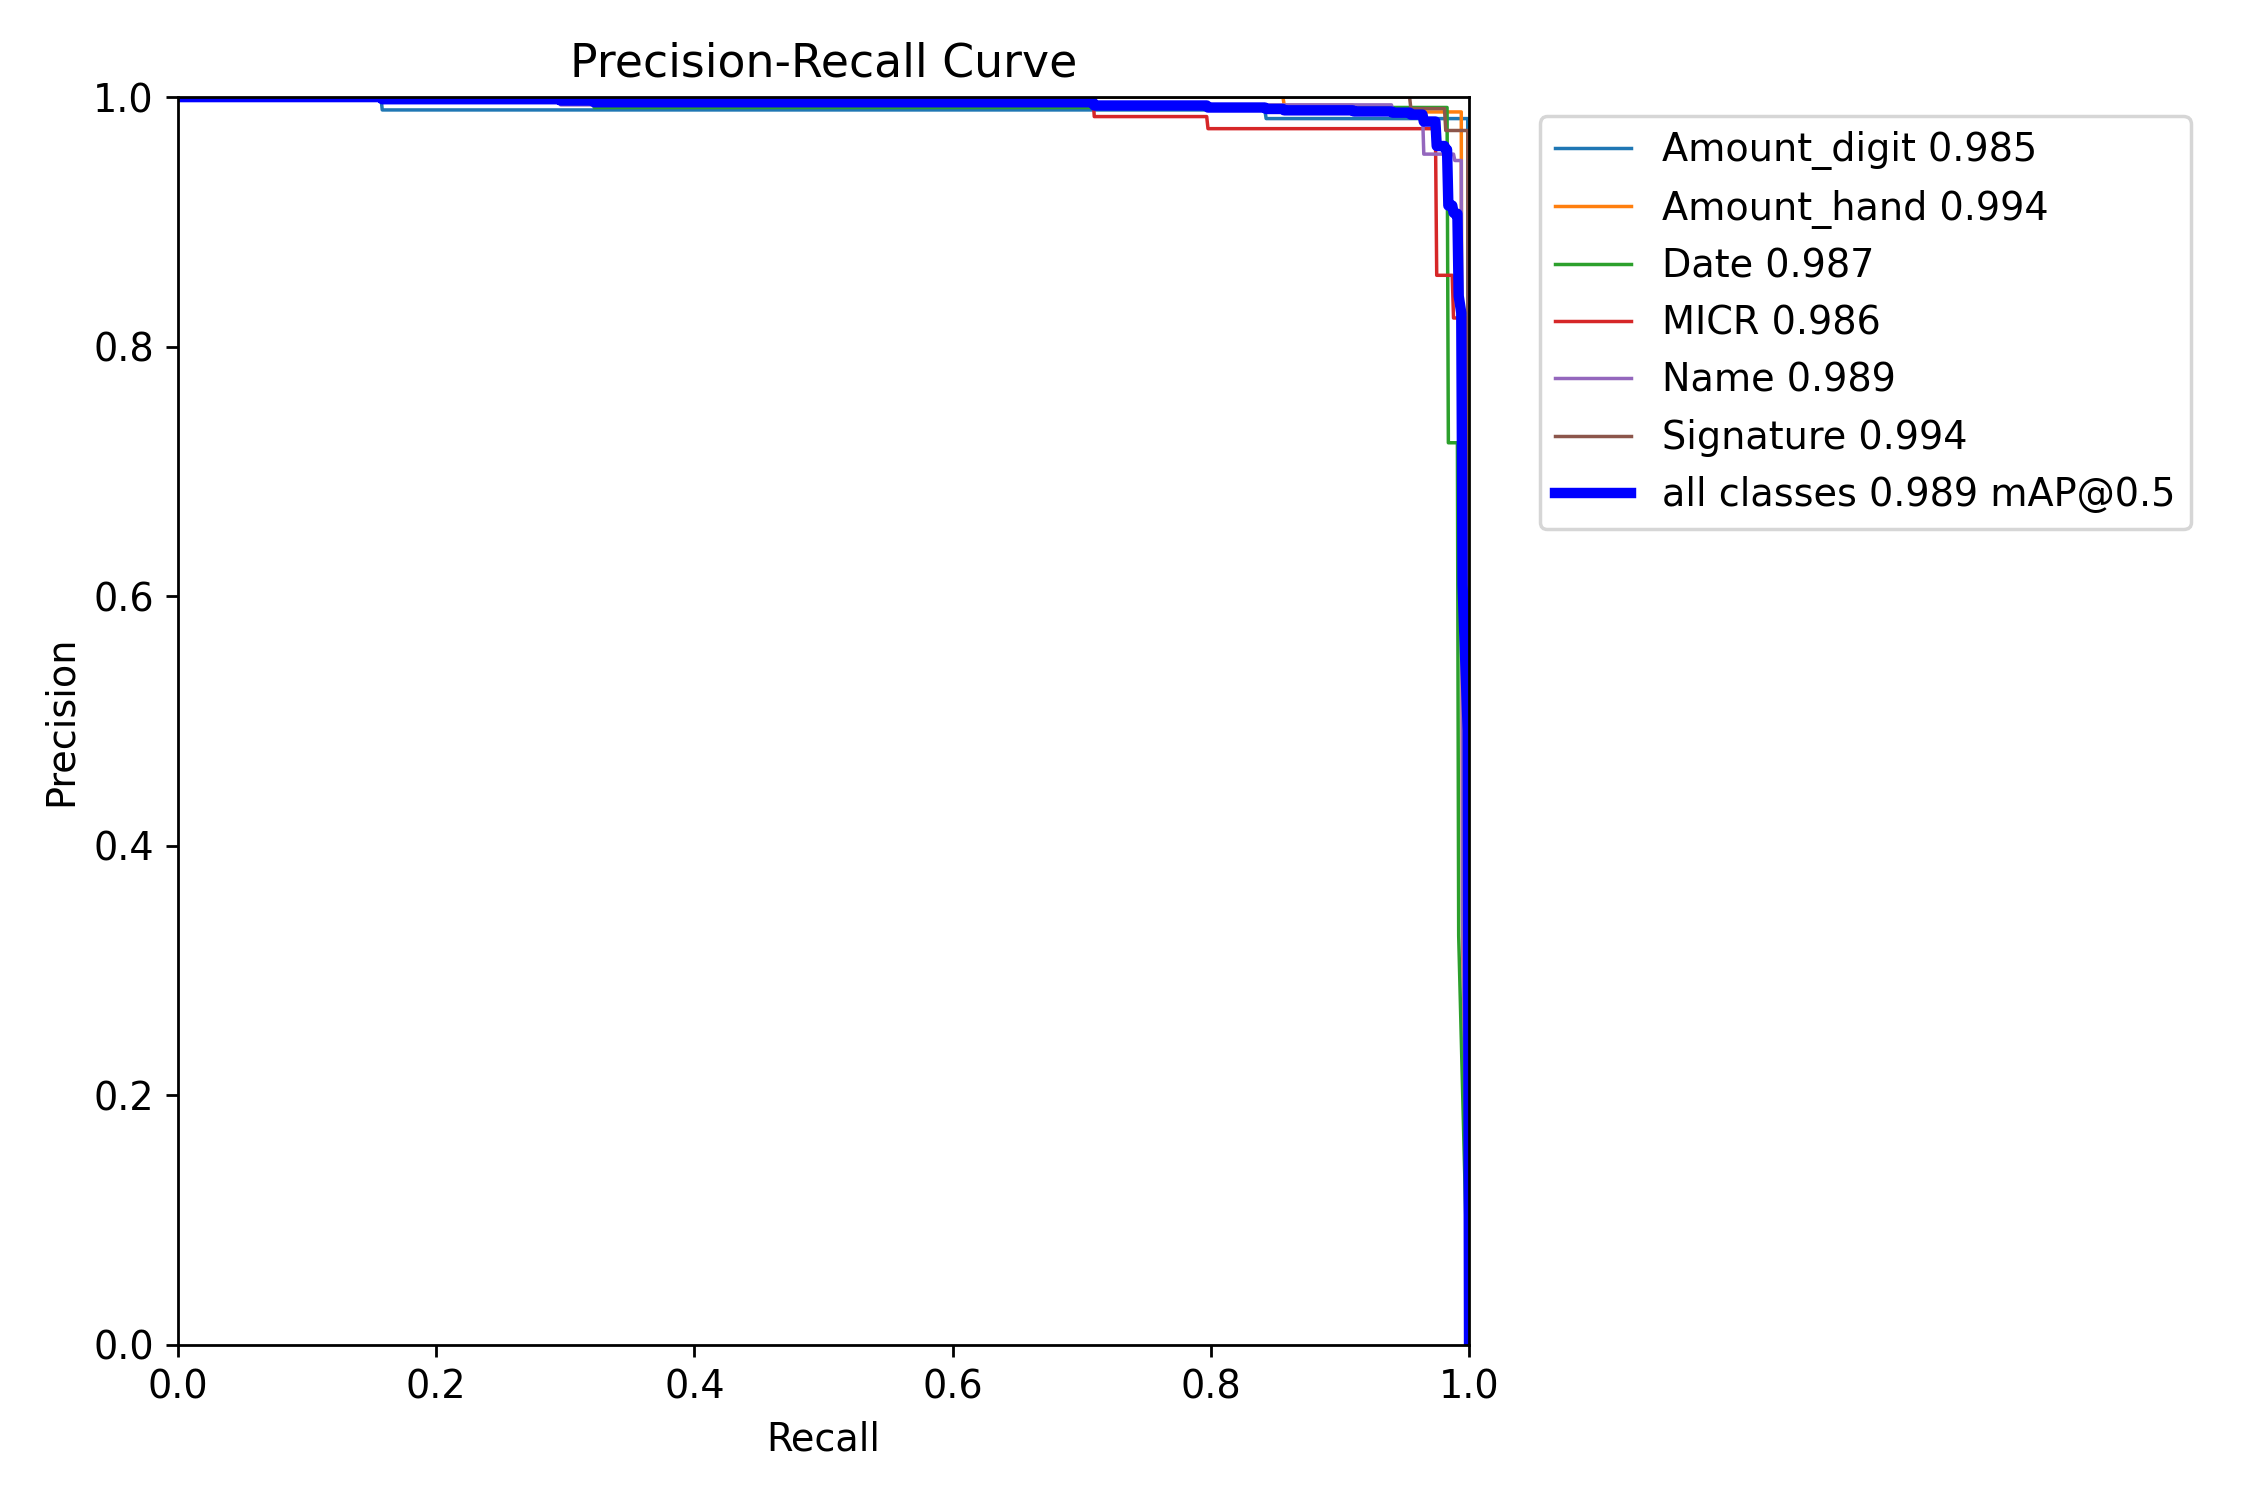

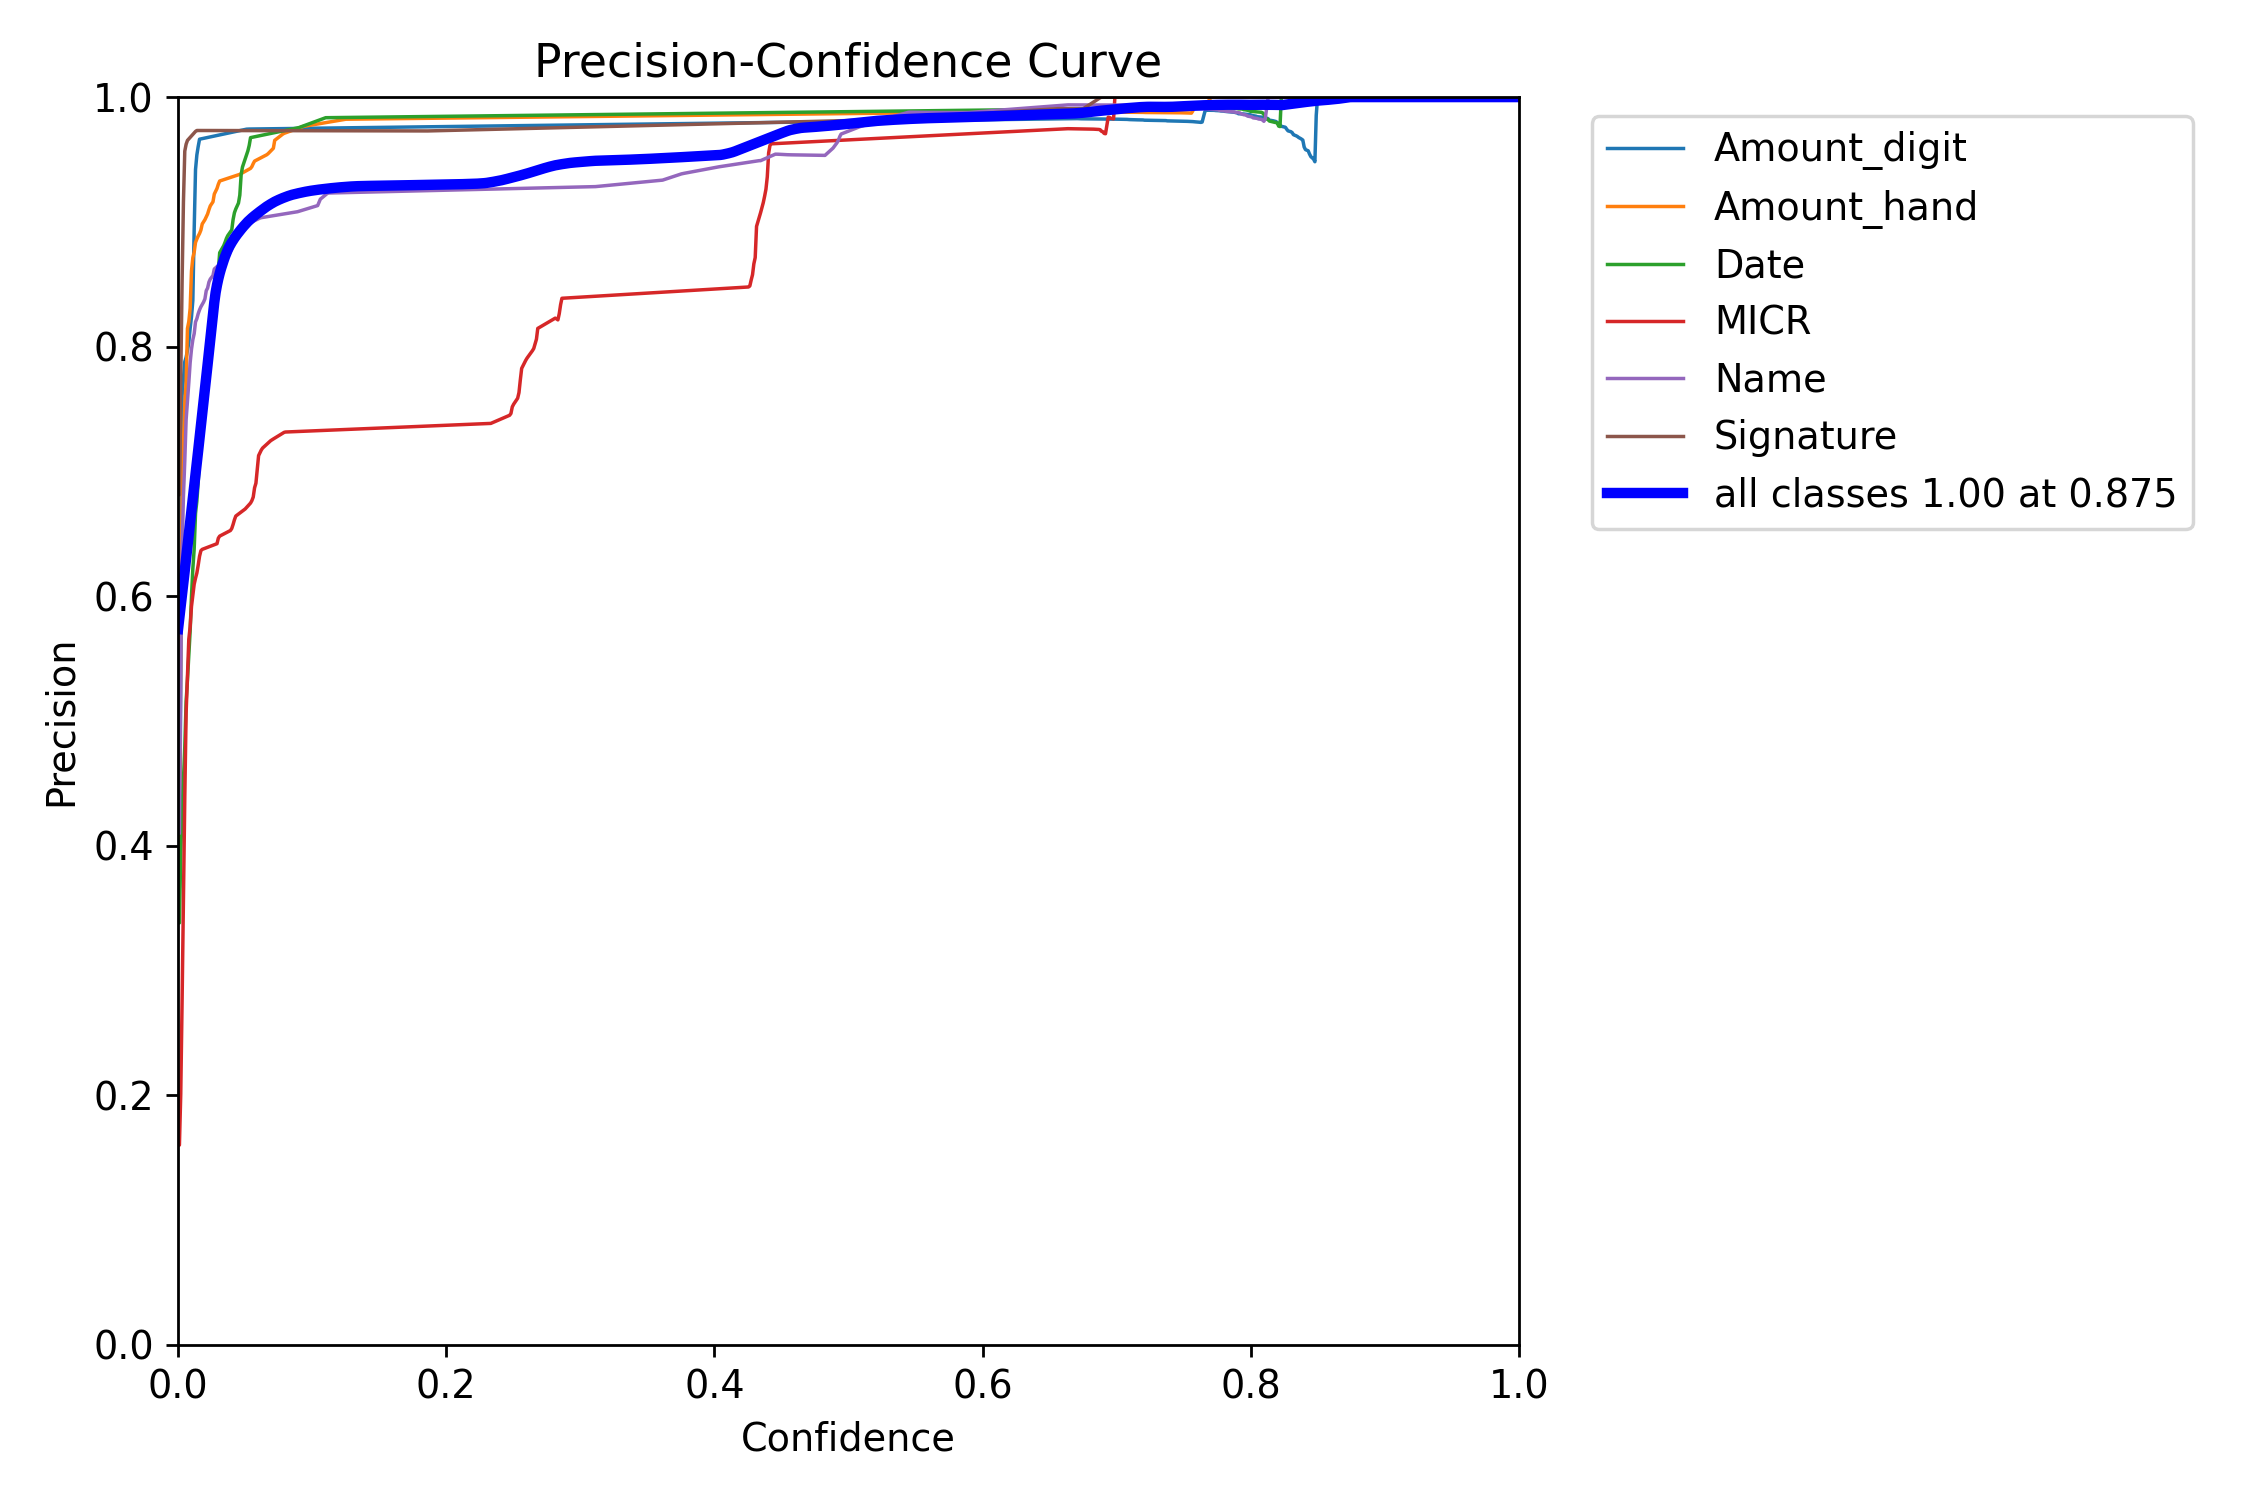

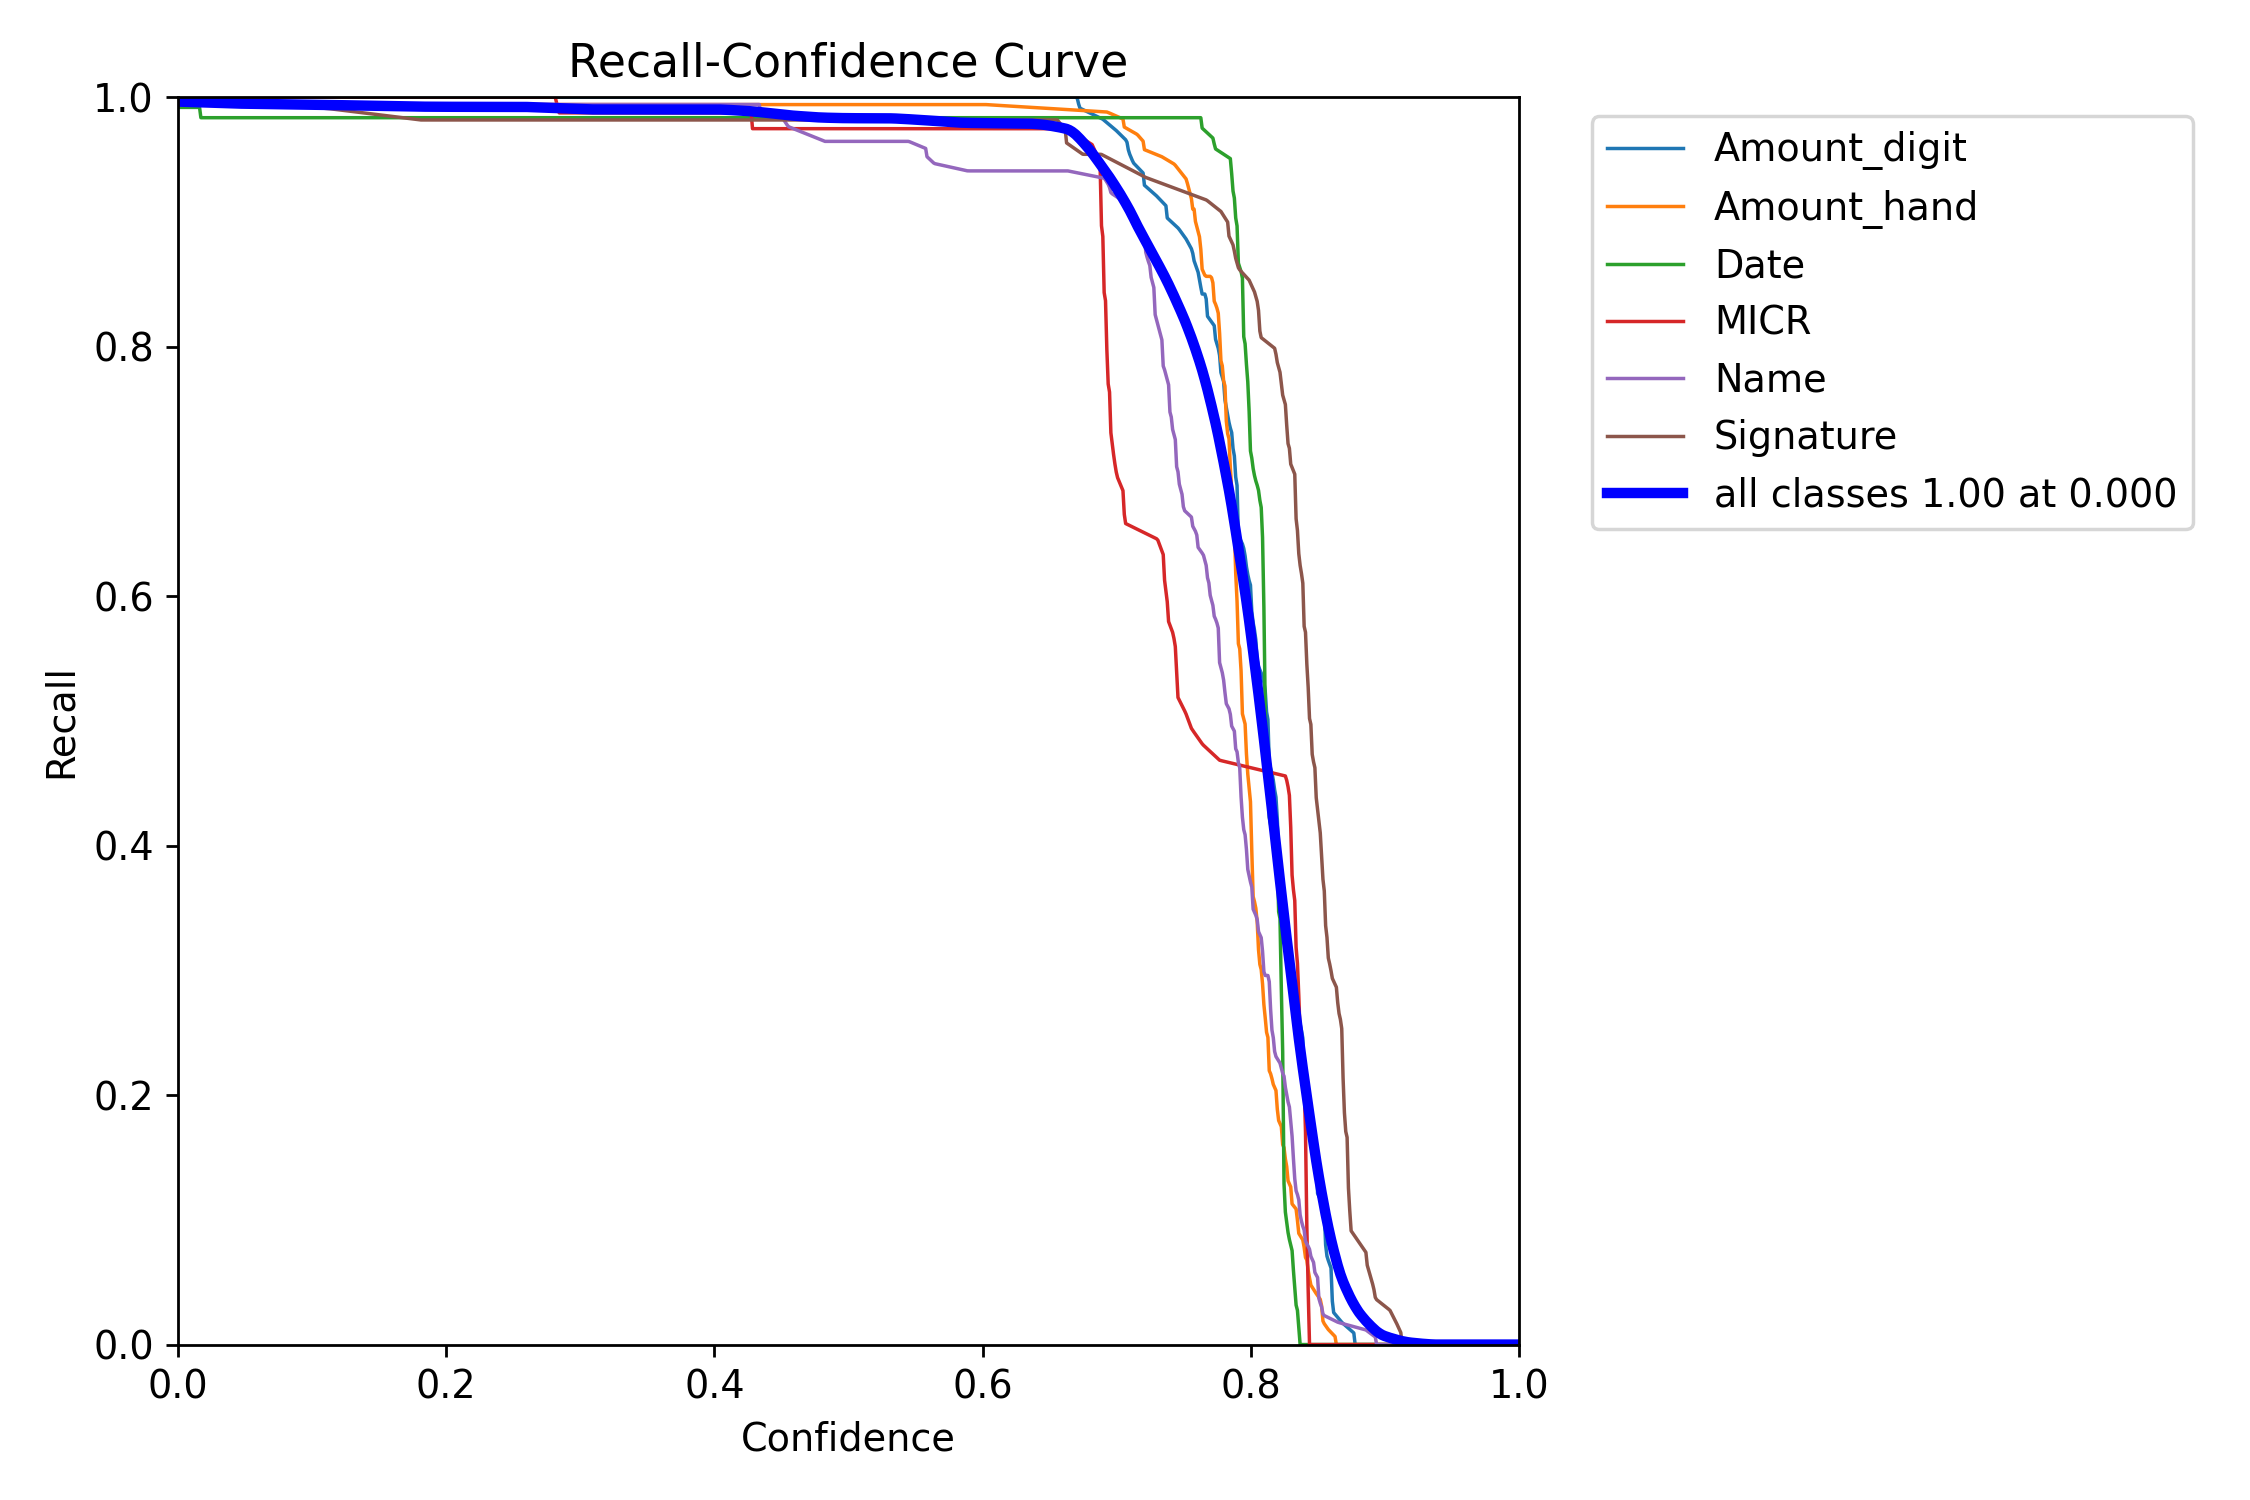

In [56]:
from IPython.display import Image, display
import os

# Define the directory containing the images
directory = r'C:\Users\Admin\Documents\ultralytics\datasets\runs\detect\train'

# List of image file names
image_files = ['confusion_matrix.png', 'F1_curve.png', 'PR_curve.png', 'P_curve.png', 'R_curve.png']

# Display the images inline with the notebook
for image_file in image_files:
    image_path = os.path.join(directory, image_file)
    display(Image(filename=image_path, width=600))

## Performance

Overall Performance:

The model achieved  overall mAP50 score of 0.989, indicating high accuracy in detecting objects across all classes.
With a precision (P) of 0.983 and recall (R) of 0.980

Individual Class Performance:
- Amount_digit: Achieved a precision of 0.981 and a perfect recall of 1.000, resulting in a high mAP50 score of 0.985. This indicates accurate detection of digit amounts.
- Amount_hand: Exhibited exceptional precision 0.988 and recall 0.994, leading to an outstanding mAP50-95 score of 0.994. The model excels in identifying hand-written amounts.
- Date: Demonstrated high precision 0.989 and recall 0.983, resulting in a commendable mAP50 score of 0.987. The model accurately detects dates.
- MICR: Showed good precision 0.970 and recall 0.975, leading to a solid mAP50 score of 0.986. The model performs well in recognizing MICR codes.
- Name: Achieved a precision of 0.988 and a recall of 0.945, resulting in a high mAP50 score of 0.989. The model accurately identifies names.
- Signature: Exhibited strong precision 0.985 and recall 0.982, resulting in an excellent mAP50-95 score of 0.994. The model excels in detecting signatures.

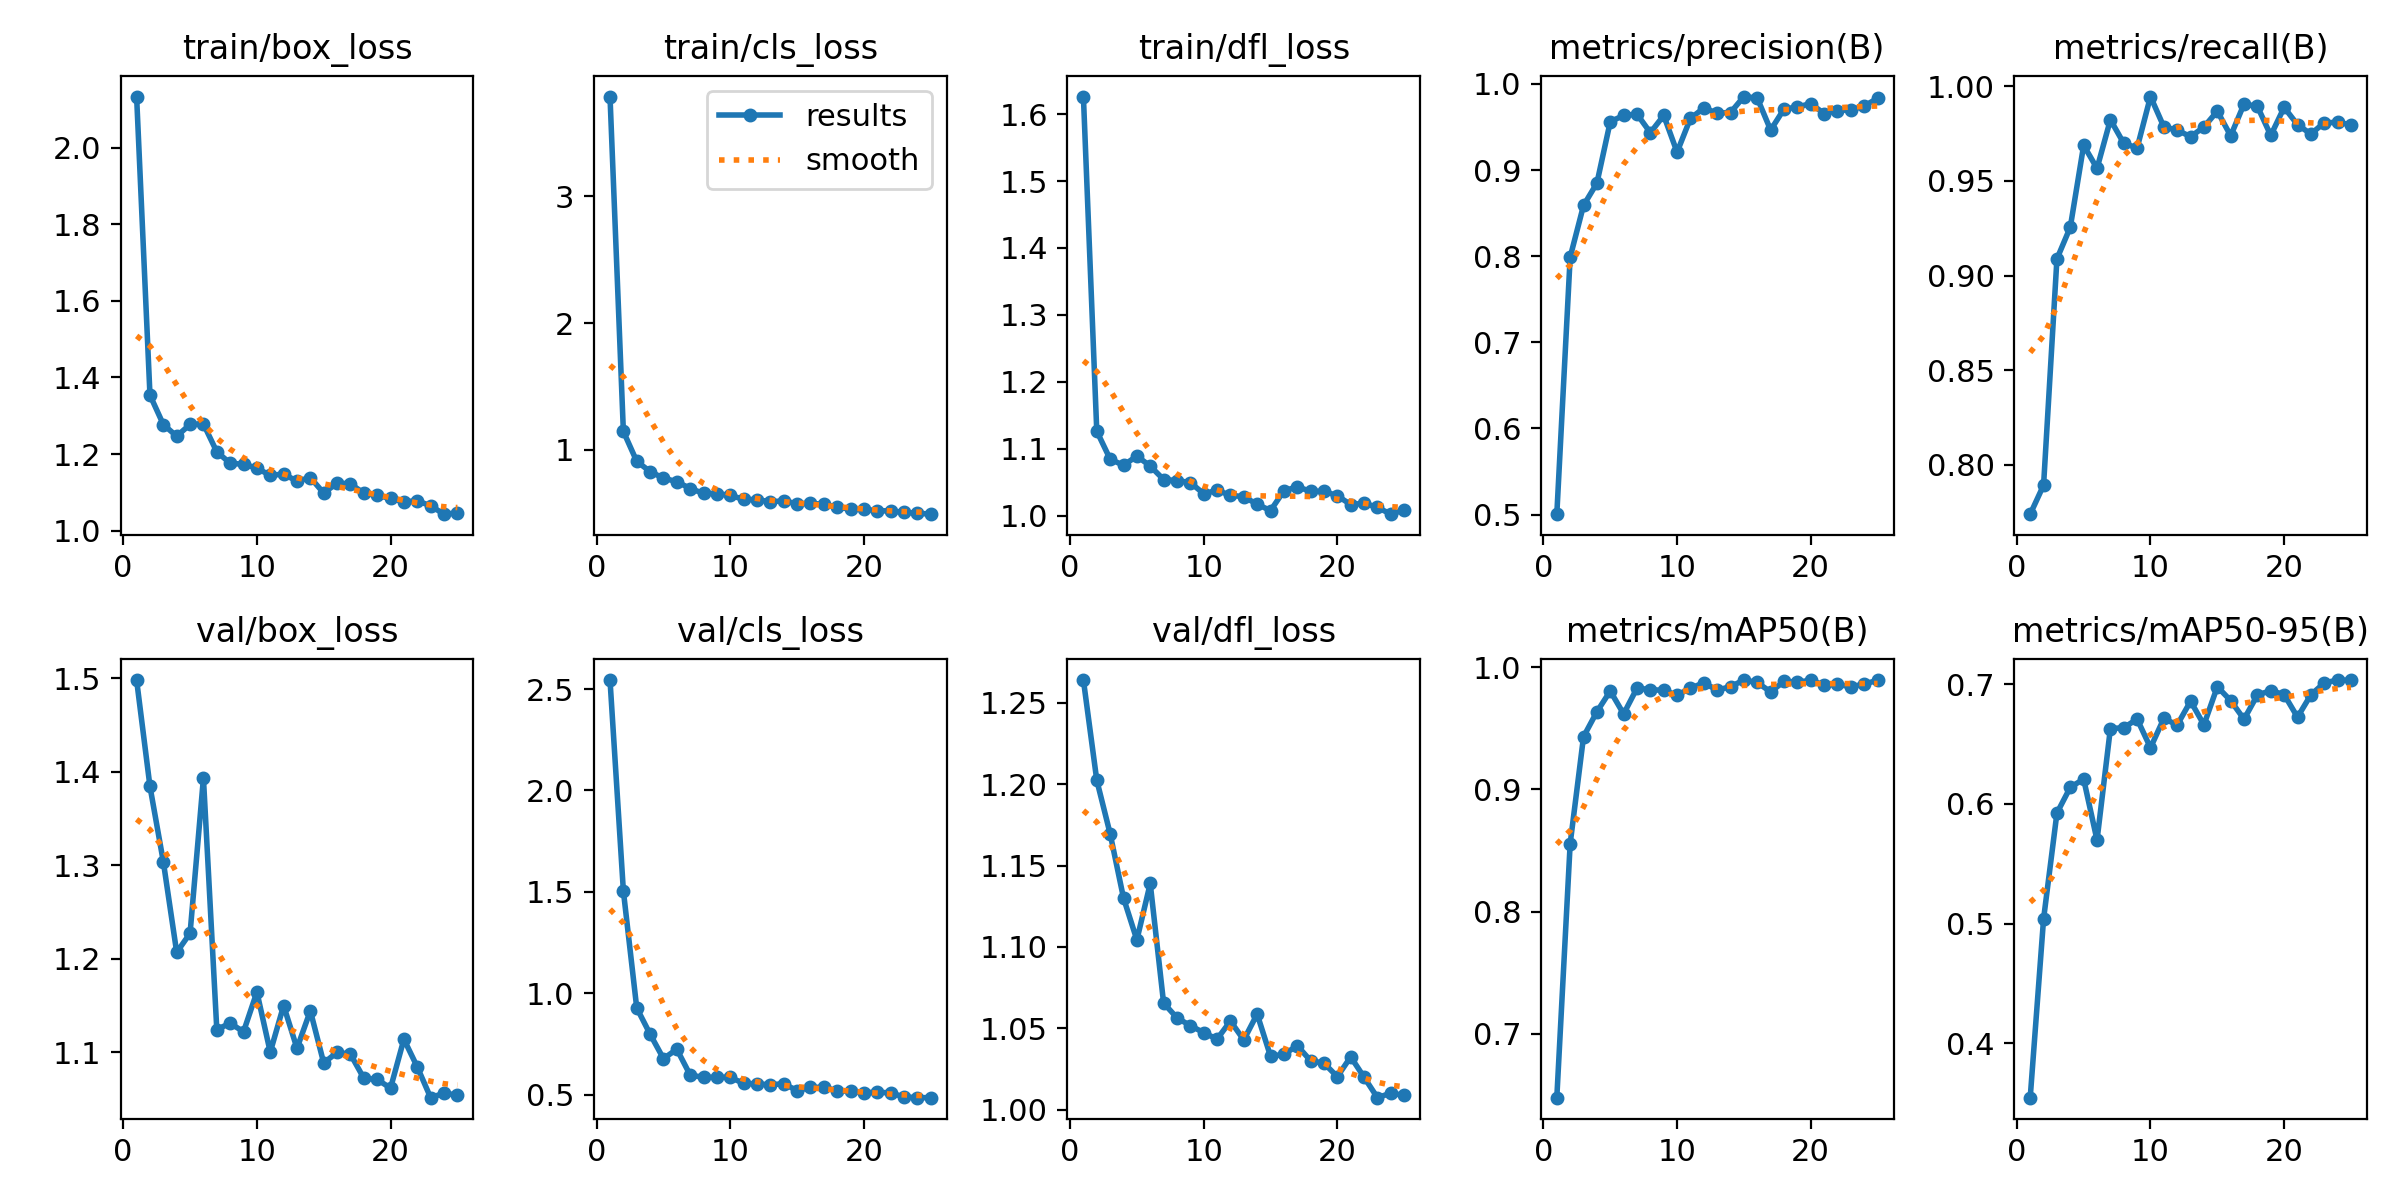

In [32]:
# Define the path to the confusion matrix image
image_path1 = r'C:\Users\Admin\Documents\ultralytics\datasets\runs\detect\train\results.png'

# Display the image inline with the notebook
Image(filename=image_path1, width=600)

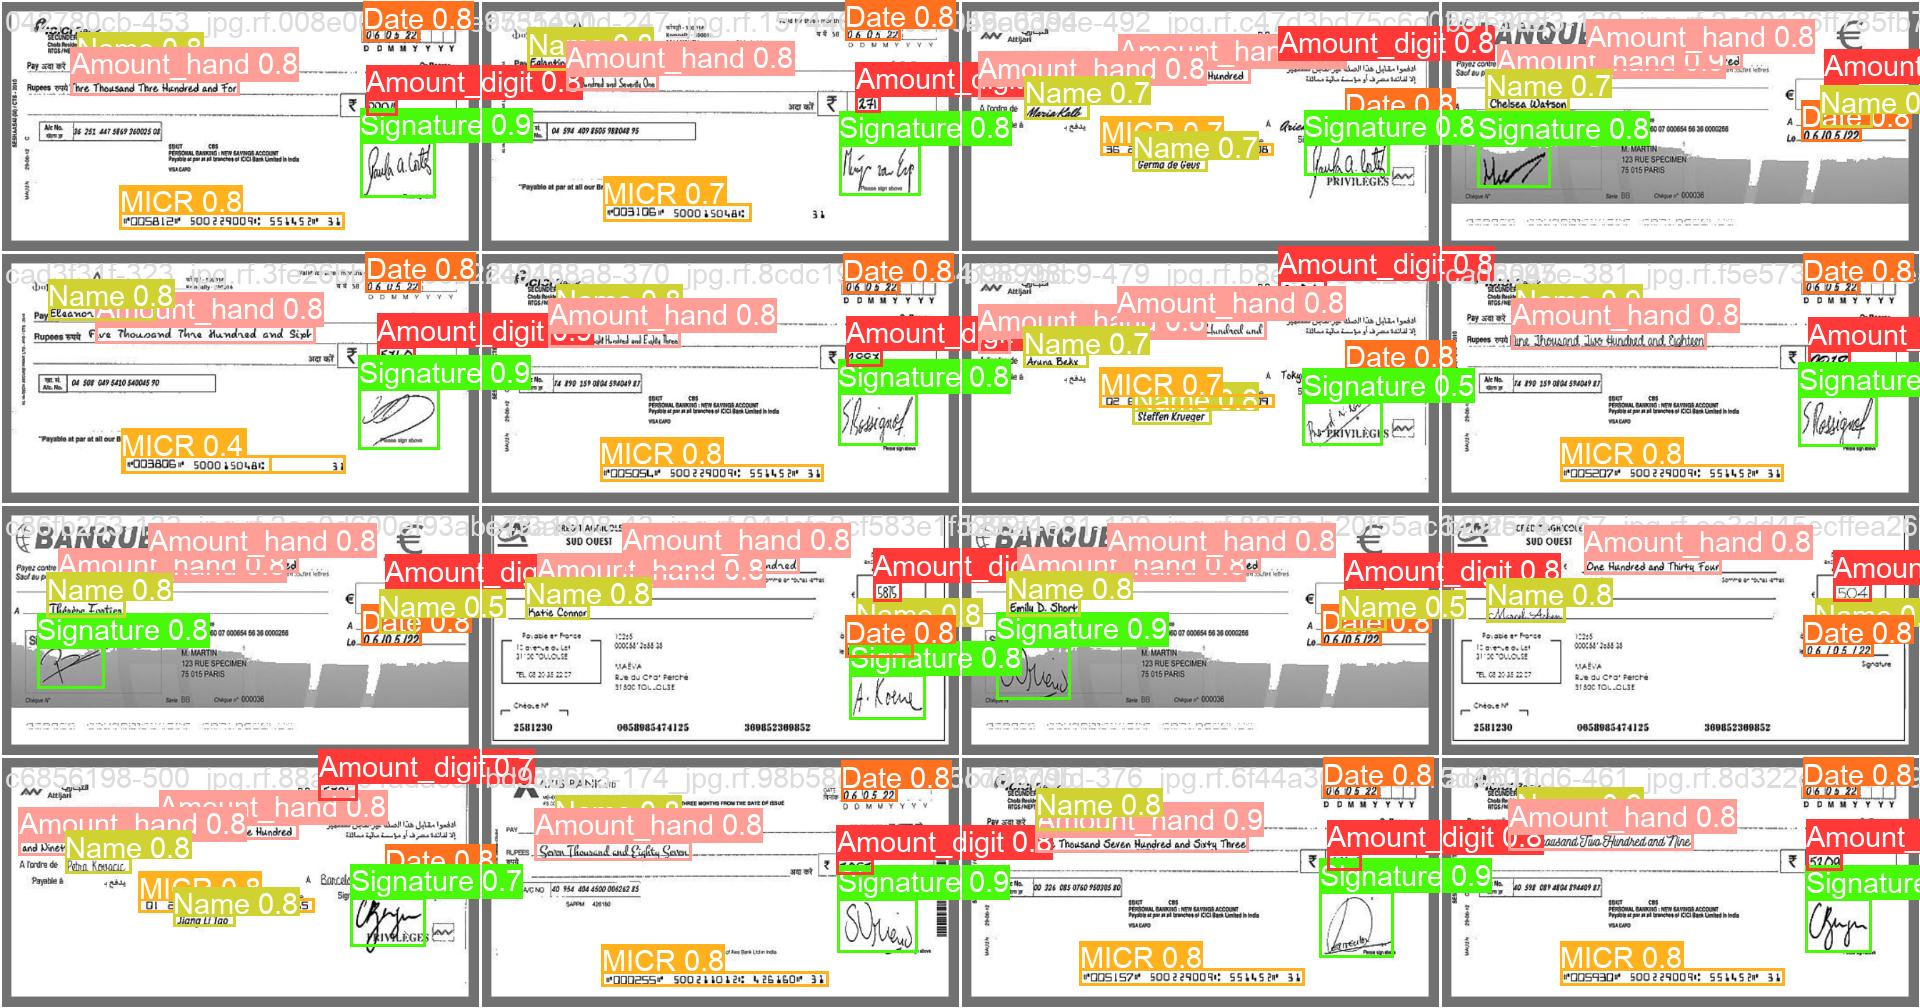

In [34]:
# Define the path to the confusion matrix image
image_path2 = r'C:\Users\Admin\Documents\ultralytics\datasets\runs\detect\train\val_batch0_pred.jpg'

# Display the image inline with the notebook
Image(filename=image_path2, width=600)

## Validate Mode

```Python
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml
```

Validation using Ultralytics YOLOv8 involves a comprehensive evaluation process that considers various aspects of model performance and accuracy. This encompasses a range of metrics and techniques tailored to assess the model's effectiveness in detecting objects within images or videos. Factors such as precision, recall, and mAP (mean Average Precision) play pivotal roles in gauging the model's capability to correctly identify objects while minimizing false positives and negatives. Additionally, considerations such as dataset composition, annotation quality, and model architecture contribute to the overall validation process, ensuring that the model's performance aligns with the intended use case and requirements. Through systematic validation procedures, users can confidently evaluate the reliability and robustness of their YOLOv8 models, facilitating informed decision-making and iterative improvements for enhanced object detection outcomes.

Here is an explanation of some of the commonly used parameters:

Parameter           | Description 
:-------------------|:---------------------------------------------------------------------------------------------------------
`model`             | Path to model file
`source`            | Source directory for images or videos
`conf`              | Object confidence threshold for detection
`iou`               | Intersection over union (IoU) threshold for NMS
`half`              | Using half precision (FP16)
`plots`             | Generates and saves plots of predictions versus ground truth for visual evaluation of the model's performance
`rect`              | Uses rectangular inference for batching, reducing padding and potentially increasing speed and efficiency
`imgsz`             | Size of input images as integer
`split`             | Allows flexibility in choosing the data segment for performance evaluation
`max_det`           | Limits the maximum number of detections per image. Useful in dense scenes to prevent excessive detections.


## Validate Custom Model

In [38]:
!yolo task=detect mode=val model=C:/Users/Admin/Documents/ultralytics/datasets/runs/detect/train/weights/best.pt data=C:/Users/Admin/Documents/ultralytics/datasets/chequeinfo-2/data.yaml

Ultralytics YOLOv8.0.196  Python-3.11.3 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

val: Scanning C:\Users\Admin\Documents\ultralytics\datasets\chequeinfo-2\valid\labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]
val: Scanning C:\Users\Admin\Documents\ultralytics\datasets\chequeinfo-2\valid\labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:00<00:03,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:00<00:02,  2.10it/s]
                 Class     Images  Instances      Box(P    

## Predict Mode

Basic syntax for the training command.

```Python
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True
```

The prediction settings for YOLO models encompass a range of hyperparameters and configurations that influence the model's performance, speed, and accuracy during inference on new data. Careful tuning and experimentation with these settings are essential to achieve optimal performance for a specific task. Key settings include the confidence threshold, Non-Maximum Suppression (NMS) threshold, and the number of classes considered. Additional factors affecting the prediction process are input data size and format, the presence of supplementary features such as masks or multiple labels per box, and the particular task the model is employed for.

Here is an explanation of some of the commonly used parameters:

Parameter           | Description 
:-------------------|:---------------------------------------------------------------------------------------------------------
`model`             | Path to model file
`source`            | Source directory for images or videos
`conf`              | Object confidence threshold for detection
`iou`               | Intersection over union (IoU) threshold for NMS
`half`              | Using half precision (FP16)
`show`              | Show results
`save`              | Save images with results
`imgsz`             | Size of input images as integer
`show_labels`       | Show_labels	True	
`show_conf`         | Show object confidence scores in plots

## Inference with Custom Model

In [10]:
!yolo task=detect mode=predict model=C:/Users/Admin/Documents/ultralytics/datasets/runs/detect/train/weights/best.pt conf=0.25 source=C:/Users/Admin/Documents/ultralytics/datasets/chequeinfo-2/test/images save=True

Ultralytics YOLOv8.0.196  Python-3.11.3 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

image 1/60 C:\Users\Admin\Documents\ultralytics\datasets\chequeinfo-2\test\images\0c430b7d-244_jpg.rf.67633b1307f8700fd5958c01d7e9dedc.jpg: 320x640 1 Amount_digit, 1 Amount_hand, 1 Date, 2 MICRs, 1 Name, 1 Signature, 185.5ms
image 2/60 C:\Users\Admin\Documents\ultralytics\datasets\chequeinfo-2\test\images\10086d37-234_jpg.rf.3058cd000bd4fc24c7faaaab2dd9b4a8.jpg: 320x640 1 Amount_digit, 1 Amount_hand, 1 Date, 1 MICR, 1 Name, 1 Signature, 13.6ms
image 3/60 C:\Users\Admin\Documents\ultralytics\datasets\chequeinfo-2\test\images\1030_jpg.rf.424d66cedaf5fb1957b3085ab15df81b.jpg: 320x640 1 Amount_digit, 2 Amount_hands, 1 Date, 2 Names, 1 Signature, 14.0ms
image 4/60 C:\Users\Admin\Documents\ultralytics\datasets\chequeinfo-2\test\images\166d19f1-478_jpg.rf.6d924fc8af37583bf4bf56e15a7ca5cf.jpg: 320x640 1 Amo

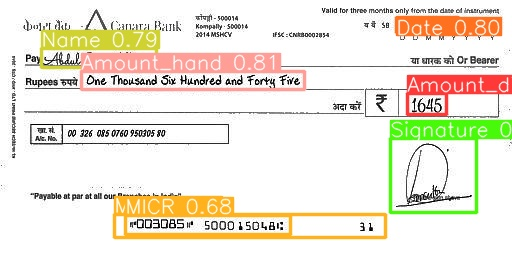

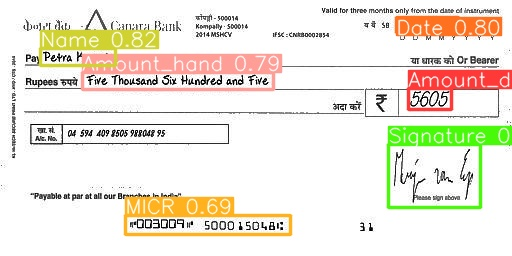

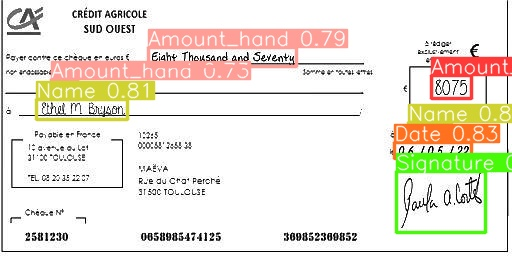

In [44]:
import glob
from IPython.display import Image, display

# Update the path to the directory containing images
image_directory = "C:/Users/Admin/Documents/ultralytics/datasets/runs/detect/predict"

# Use glob to get a list of all JPG files in the directory
image_paths = glob.glob(f'{image_directory}/*.jpg')

# Display the first three images
for image_path in image_paths[:3]:
    display(Image(filename=image_path, width=600))
    print("\n")


In [11]:
! yolo detect predict model=C:/Users/Admin/Documents/ultralytics/datasets/runs/detect/train/weights/best.pt conf=0.25 source=C:/Users/Admin/Documents/ultralytics/datasets/chequeinfo-2/test/images save_txt=True save_conf=True

Ultralytics YOLOv8.0.196  Python-3.11.3 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

image 1/60 C:\Users\Admin\Documents\ultralytics\datasets\chequeinfo-2\test\images\0c430b7d-244_jpg.rf.67633b1307f8700fd5958c01d7e9dedc.jpg: 320x640 1 Amount_digit, 1 Amount_hand, 1 Date, 2 MICRs, 1 Name, 1 Signature, 136.5ms
image 2/60 C:\Users\Admin\Documents\ultralytics\datasets\chequeinfo-2\test\images\10086d37-234_jpg.rf.3058cd000bd4fc24c7faaaab2dd9b4a8.jpg: 320x640 1 Amount_digit, 1 Amount_hand, 1 Date, 1 MICR, 1 Name, 1 Signature, 9.0ms
image 3/60 C:\Users\Admin\Documents\ultralytics\datasets\chequeinfo-2\test\images\1030_jpg.rf.424d66cedaf5fb1957b3085ab15df81b.jpg: 320x640 1 Amount_digit, 2 Amount_hands, 1 Date, 2 Names, 1 Signature, 9.5ms
image 4/60 C:\Users\Admin\Documents\ultralytics\datasets\chequeinfo-2\test\images\166d19f1-478_jpg.rf.6d924fc8af37583bf4bf56e15a7ca5cf.jpg: 320x640 1 Amoun